<a href="https://colab.research.google.com/github/cantaruttim/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('diabetes.rwrite1.csv', encoding= "utf_8", delimiter=" ")
dataset

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   map     442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
 10  y       442 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


In [4]:
dataset.isnull().sum()

age    0
sex    0
bmi    0
map    0
tc     0
ldl    0
hdl    0
tch    0
ltg    0
glu    0
y      0
dtype: int64

In [5]:
dataset.columns

Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'y'],
      dtype='object')

# **Projeto Diabetes**

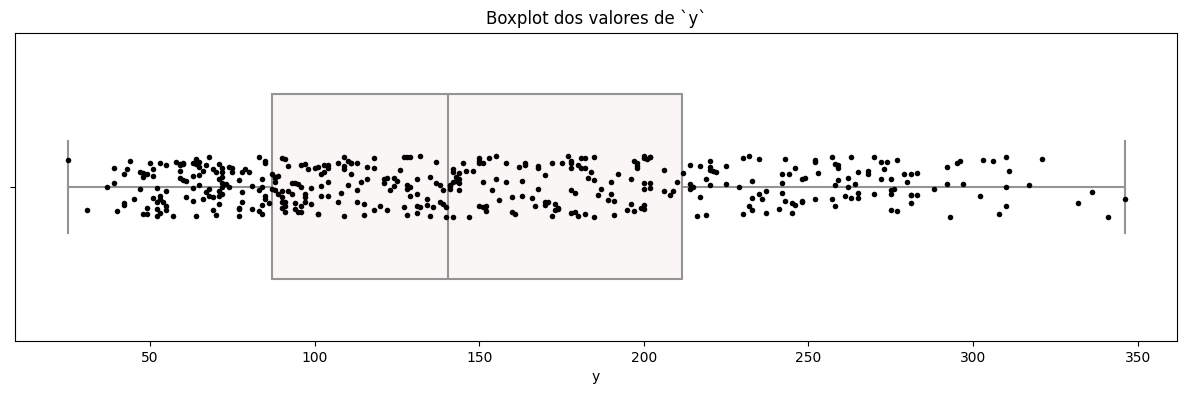

In [6]:
plt.figure(figsize=(15,4))

sns.boxplot(x="y", data=dataset,
            whis=[0, 100], width=.6, palette="vlag");

# Add in points to show each observation
sns.stripplot(x="y", data=dataset,
              size=4, color="0", linewidth=0);

plt.title("Boxplot dos valores de `y`")
plt.show()

In [54]:
dataset[dataset['y'] > 150]

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y,Groups
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151,2
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206,2
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310,2
12,0.016281,-0.044642,-0.028840,-0.009113,-0.004321,-0.009769,0.044958,-0.039493,-0.030751,-0.042499,179,1
13,0.005383,0.050680,-0.001895,0.008101,-0.004321,-0.015719,-0.002903,-0.002592,0.038393,-0.013504,185,2
...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.048974,0.050680,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066048,0.131470,310,0
430,-0.009147,-0.044642,-0.056863,-0.050428,0.021822,0.045345,-0.028674,0.034309,-0.009919,-0.017646,183,1
432,0.009016,-0.044642,0.055229,-0.005671,0.057597,0.044719,-0.002903,0.023239,0.055684,0.106617,173,0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178,2


In [55]:
dataset[(dataset['y'] >= 100) & (dataset['y'] <= 150)]

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y,Groups
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141,2
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135,1
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138,1
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110,2
10,-0.096328,-0.044642,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062913,-0.034215,101,1
...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.023546,-0.044642,-0.036385,0.000068,0.001183,0.034698,-0.043401,0.034309,-0.033249,0.061054,146,2
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,111,2
426,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907,120,0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104,0


In [56]:
dataset[(dataset['y'] >= 69) & (dataset['y'] <= 99)]

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y,Groups
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75,1
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97,1
11,0.027178,0.050680,0.017506,-0.033214,-0.007073,0.045972,-0.065491,0.071210,-0.096433,-0.059067,69,2
18,-0.038207,-0.044642,-0.010517,-0.036656,-0.037344,-0.019476,-0.028674,-0.002592,-0.018118,-0.017646,97,1
27,-0.023677,-0.044642,0.059541,-0.040099,-0.042848,-0.043589,0.011824,-0.039493,-0.015998,0.040343,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.056370,-0.044642,-0.080575,-0.084857,-0.037344,-0.037013,0.033914,-0.039493,-0.056158,-0.137767,72,1
418,0.009016,-0.044642,-0.024529,-0.026328,0.098876,0.094196,0.070730,-0.002592,-0.021394,0.007207,84,0
423,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015567,-0.046641,91,0
429,-0.041840,-0.044642,-0.033151,-0.022885,0.046589,0.041587,0.056003,-0.024733,-0.025952,-0.038357,94,1


In [57]:
dataset[dataset['y'] < 69]

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y,Groups
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63,0
20,-0.049105,-0.044642,-0.056863,-0.043542,-0.045599,-0.043276,0.000779,-0.039493,-0.011901,0.015491,68,1
21,-0.085430,0.050680,-0.022373,0.001215,-0.037344,-0.026366,0.015505,-0.039493,-0.072128,-0.017646,49,1
22,-0.085430,-0.044642,-0.004050,-0.009113,-0.002945,0.007767,0.022869,-0.039493,-0.061177,-0.013504,68,1
31,-0.023677,-0.044642,-0.065486,-0.081414,-0.038720,-0.053610,0.059685,-0.076395,-0.037128,-0.042499,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.070769,0.050680,-0.030996,0.021872,-0.037344,-0.047034,0.033914,-0.039493,-0.014956,-0.001078,66,2
434,0.016281,-0.044642,0.001339,0.008101,0.005311,0.010899,0.030232,-0.039493,-0.045421,0.032059,49,1
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357,64,1
436,-0.056370,-0.044642,-0.074108,-0.050428,-0.024960,-0.047034,0.092820,-0.076395,-0.061177,-0.046641,48,1


<Axes: >

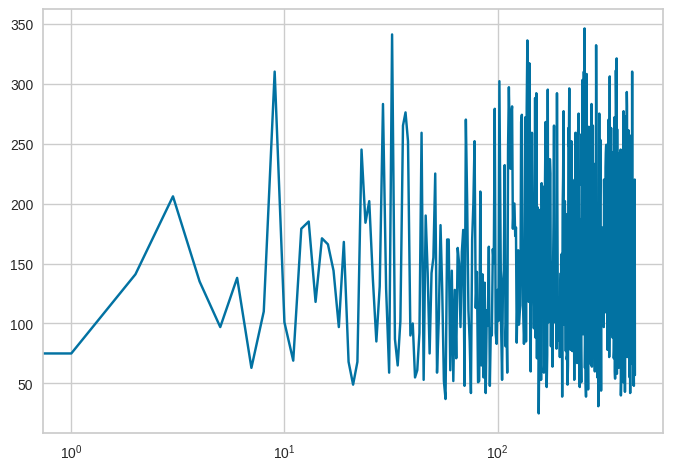

In [64]:
dataset['y'].plot(logx = True)

In [7]:
dataset[['tc', 'ldl']]

,tc,ldl
0,-0.044223,-0.034821
1,-0.008449,-0.019163
2,-0.045599,-0.034194
3,0.012191,0.024991
4,0.003935,0.015596
...,...,...
437,-0.005697,-0.002566
438,0.049341,0.079165
439,-0.037344,-0.013840
440,0.016318,0.015283


In [8]:
dataset.iloc[:, 4]
print(dataset.iloc[:, 4].shape)

(442,)


In [9]:
dataset.iloc[:, 5]
print(dataset.iloc[:, 5].shape)

(442,)


In [10]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 4].values
y = dataset.iloc[:, 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Reshaping data

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

Coeficiente r²: 0.8422340486802888 



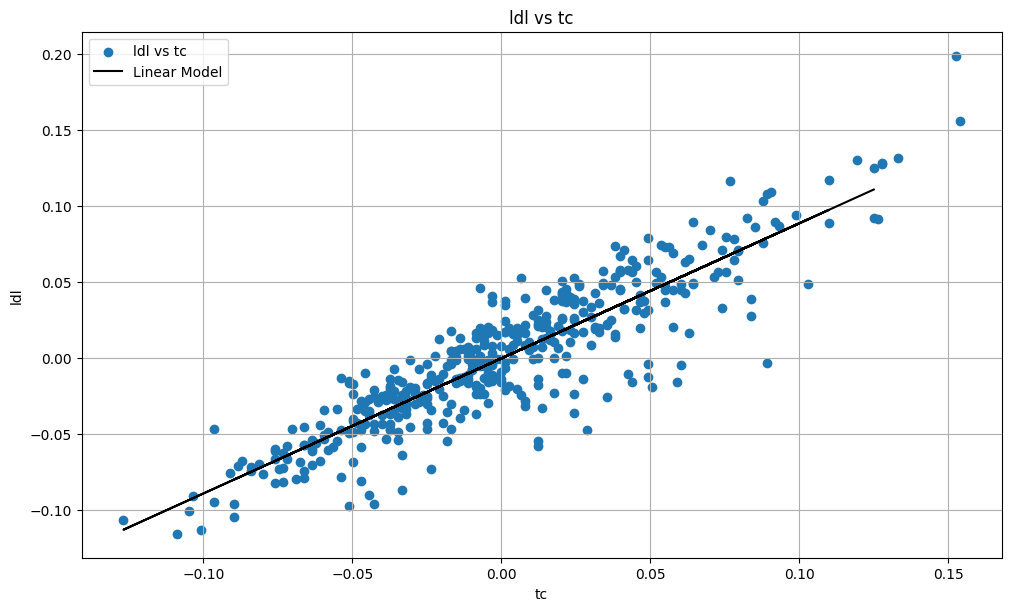

In [12]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, pred)
print(f'Coeficiente r²: {r_squared}', '\n')

##### GRÁFICO #######
### Vamos verificar a linearidade de ldl com tc

f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(X, y, marker = 'o',
           label = 'ldl vs tc')
ax.plot(X_test, pred, 'black', label = 'Linear Model')

ax.set_xlabel('tc')
ax.set_ylabel('ldl')
ax.set_title("ldl vs tc")

ax.grid(True)
ax.legend(loc = "upper left");
plt.show()

In [13]:
reg.coef_

array([[0.88818032]])

In [14]:
reg.intercept_

array([-0.00031262])

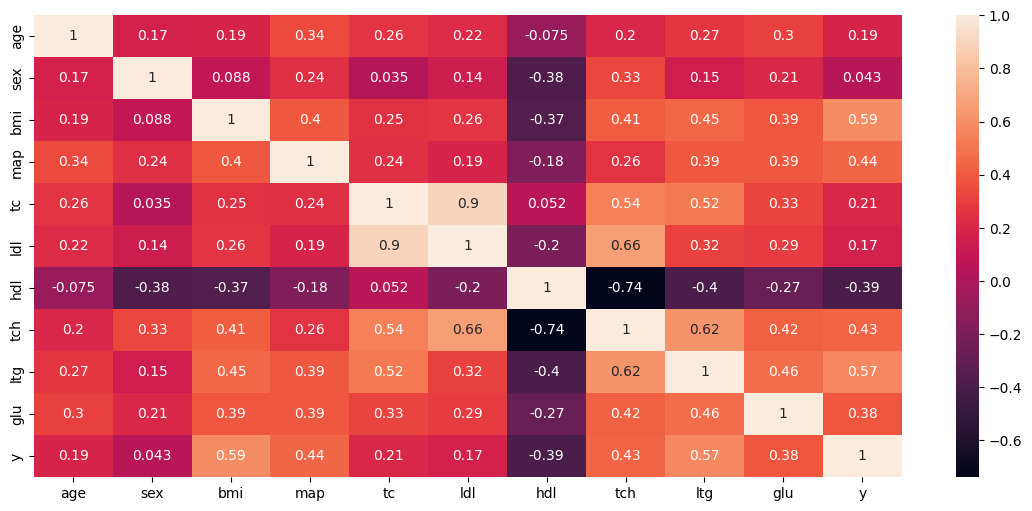

In [15]:
plt.figure(figsize=(14,6))
sns.heatmap(dataset.corr(), annot=True);

In [16]:
X2 = dataset[['bmi', 'ltg']]

In [ ]:
X2 = X2.iloc[:, 0:2].values
X2

In [ ]:
dataset['glu'].values

In [ ]:
y2 = dataset.iloc[:, 10].values
y2

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state=42)

# Reshaping data

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## Treinando um Regressor Linear

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2, y2)

LinearRegression()

In [22]:
pred = reg.predict(X_test)

In [23]:
regressor.score(X2, y2)

0.4594852440167805

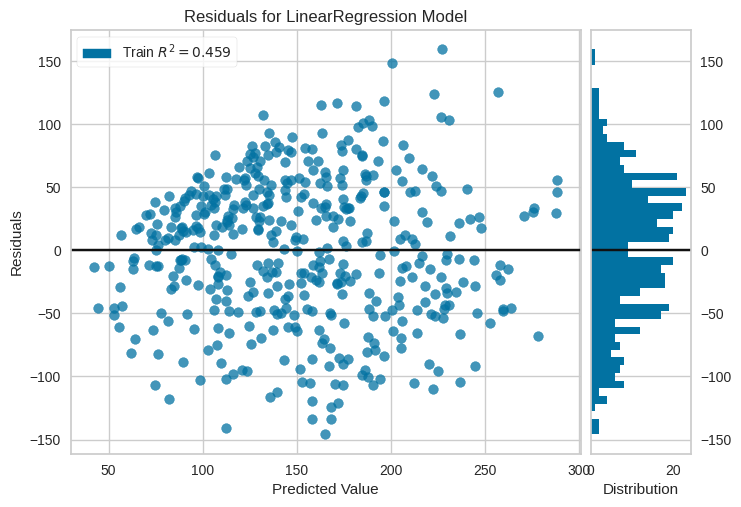

In [24]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor)
visualizador.fit(X2, y2)
visualizador.poof() ;

## Treinando um Elastic Net

In [25]:
from sklearn.linear_model import ElasticNet

elastic_regr = ElasticNet(random_state=0).fit(X2, y2)

In [ ]:
elastic_pred = reg.predict(X_test)
elastic_pred

In [27]:
elastic_regr.score(X2, y2)

0.004545720296209921

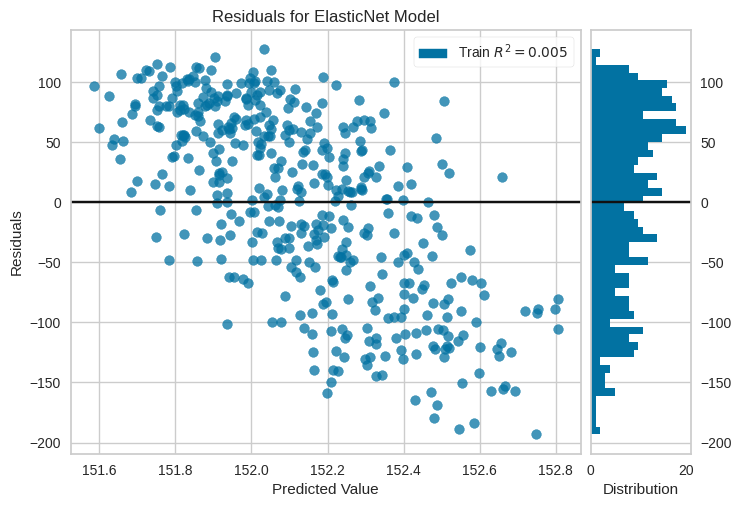

In [28]:
visualizador = ResidualsPlot(elastic_regr)
visualizador.fit(X2, y2)
visualizador.poof() ;

# **Agrupamento**

-- Vamos encontrar os pacientes semelhantes para esse conjunto de dados

In [29]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [30]:
dataset.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135


In [70]:
X = dataset.iloc[:, 0:10].values # todas as colunas

agrupamento = KMeans(n_clusters=3, random_state=1)
agrupamento.fit(X)

dataset['Groups'] = agrupamento.labels_
dataset.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y,Groups
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151,2
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75,1
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141,2
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206,2
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135,1


In [71]:
np.unique(agrupamento.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([122, 161, 159]))

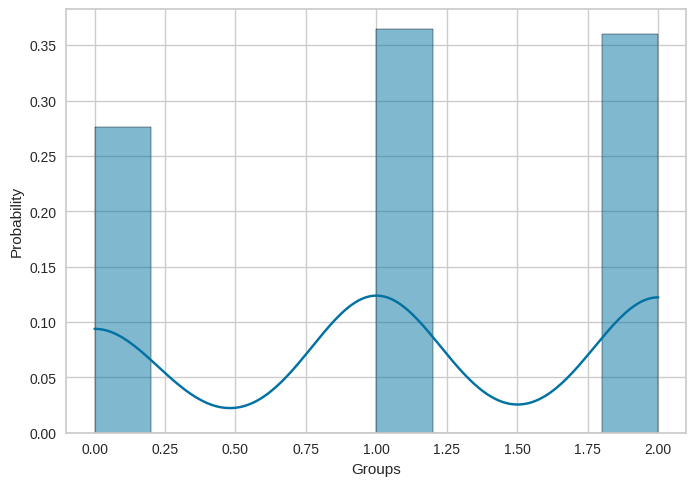

In [33]:
import seaborn as sns

sns.histplot(dataset['Groups'], kde = True, stat = 'probability');

In [34]:
y = dataset['Groups'].values
y

array([2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2,

In [35]:
dataset2 = dataset[['age', 'sex', 'bmi', 'glu', 'Groups']]

In [36]:
dataset2.head()

,age,sex,bmi,glu,Groups
0,0.038076,0.050680,0.061696,-0.017646,2
1,-0.001882,-0.044642,-0.051474,-0.092204,1
2,0.085299,0.050680,0.044451,-0.025930,2
3,-0.089063,-0.044642,-0.011595,-0.009362,2
4,0.005383,-0.044642,-0.036385,-0.046641,1


In [37]:
X = dataset2.iloc[:, 0:4].values
X

array([[ 0.03807591,  0.05068012,  0.06169621, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 ,  0.00306441]])

In [38]:
y = dataset2.iloc[:, 4].values
y

array([2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2,

In [39]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [65]:
kmeans_normalizados = KMeans(n_clusters=4, algorithm="elkan")
kmeans_normalizados.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(algorithm='elkan', n_clusters=4)

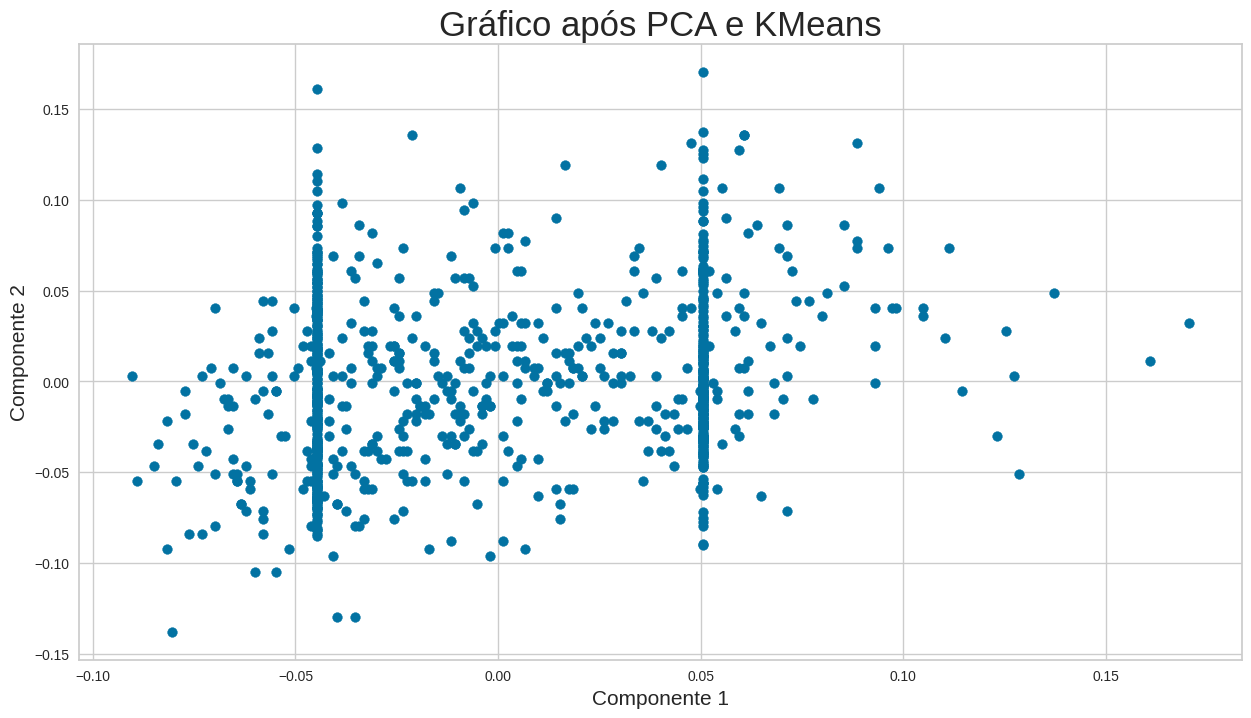

In [66]:
plt.figure(figsize=(15,8))

plt.scatter(x = X[:,1:3], y = X[:, 2:4])
plt.title("Gráfico após PCA e KMeans", fontsize = 25)
plt.xlabel("Componente 1", fontsize = 15)
plt.ylabel("Componente 2", fontsize = 15)

plt.grid(True)
plt.show()

In [43]:
centroides = kmeans_normalizados.cluster_centers_
rotulos = kmeans_normalizados.labels_

In [67]:
centroides, rotulos

(array([[ 0.68253611,  1.06548848,  0.55680412,  0.74087235],
        [-0.78063653, -0.93853666, -0.78005082, -0.86526412],
        [ 0.36212571, -0.93853666,  0.51024372,  0.37435804],
        [-0.40131857,  1.06548848, -0.45176342, -0.39023842]]),
 array([0, 1, 0, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 3, 1, 3, 2, 0, 1, 1, 1, 3,
        1, 0, 1, 3, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 3, 0, 1, 3, 2,
        0, 3, 1, 1, 3, 3, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 3, 3, 1, 0, 3,
        3, 0, 3, 2, 1, 2, 0, 3, 0, 3, 3, 1, 1, 1, 2, 3, 1, 1, 1, 2, 3, 2,
        3, 1, 2, 2, 2, 1, 1, 1, 0, 2, 3, 1, 2, 3, 1, 0, 2, 3, 1, 2, 0, 0,
        0, 2, 1, 0, 2, 3, 0, 2, 3, 2, 1, 2, 0, 0, 2, 3, 1, 3, 1, 2, 0, 1,
        0, 3, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 3, 3, 2, 2, 0, 3,
        0, 0, 1, 3, 1, 2, 1, 0, 2, 0, 2, 1, 3, 2, 0, 2, 3, 1, 0, 3, 0, 2,
        0, 2, 2, 1, 3, 1, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 3, 0, 1, 0, 1, 0,
        1, 2, 2, 3, 0, 0, 0, 2, 0, 2, 2, 3, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1,
        3,

In [69]:
grafico1 = px.scatter(x = X[:,2], y = X[:,3], color=rotulos)
grafico2 = px.scatter(x = centroides[:,1], y = centroides[:,3], size = [7, 7, 7, 7])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



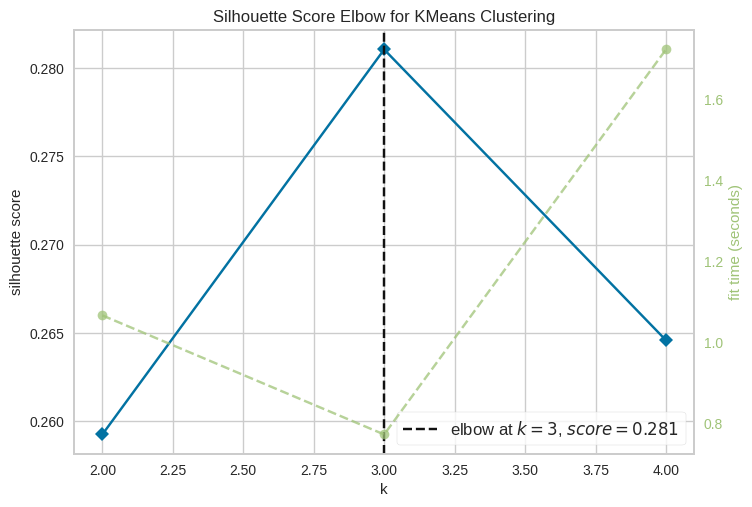

In [46]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(kmeans_normalizados)
visualizer = KElbowVisualizer(model, k=4, metric="silhouette")

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() ;